<a href="https://colab.research.google.com/github/Devwarlt/BairesDev---Machine-Learning-Training/blob/main/reducao_de_dimensionalidades_em_imagens_para_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Projeto: `Redução de dimensionalidade em imagens`

In [1]:
def read_pixels(path):
  with open(path, 'rb') as img:
    header = img.read(54)
    hdr_val = header[0:2]
    if hdr_val != b'BM':
      raise ValueError\
       (f'Only BMP images are supported. | ERR: {hdr_val}')

    width = int.from_bytes(header[18:22], byteorder='little')
    height = int.from_bytes(header[22:26], byteorder='little')
    bits_per_pixel = int.from_bytes(header[28:30], byteorder='little')


    if bits_per_pixel != 24:
      raise ValueError\
       (f'Only 24-bit images are supported. | ERR: {bits_per_pixel}')

    row_padded = (width * 3 + 3) & ~3
    img_pixels = []

    for i in range(height):
      row = []
      row_bytes = img.read(row_padded)

      for j in range(width):
        i = j * 3
        b = row_bytes[i]
        g = row_bytes[i + 1]
        r = row_bytes[i + 2]

        row.append((r, g, b))

      img_pixels.insert(0, row)

    return img_pixels

In [2]:
import os

img = read_pixels(os.getcwd() + '/imgs/sample-24bits.bmp')
print(img[0][0])

(58, 73, 74)


In [3]:
import matplotlib.pyplot as plt
import copy

pixels_normalization = []

for _ in range(img.__len__()):
    pixels_normalization.append([None] * img[0].__len__())

original_matrix = copy.deepcopy(pixels_normalization)
grayscale_matrix = copy.deepcopy(pixels_normalization)
binarization_matrix = copy.deepcopy(pixels_normalization)

for row in range(img.__len__()):
  for col in range(img[row].__len__()):
    r, g, b = (i / 255 for i in img[row][col])

    # generate original image pixel matrix
    original_matrix[row][col] = [r, g, b]

    # using NTSC formula to convert to grayscale values, see:
    # https://support.ptc.com/help/mathcad/r10.0/en/index.html#page/PTC_Mathcad_Help/example_grayscale_and_color_in_images.html
    G = 0.299 * r + 0.587 * g + 0.114 * b
    grayscale_matrix[row][col] = [G, G, G]

    # using Binarization approach to convert from grayscale values, see:
    # https://support.ptc.com/help/mathcad/r10.0/en/index.html#page/PTC_Mathcad_Help/example_binarization_and_quantization.html#
    thres = 128 / 255
    B = 1.0 if G > thres else 0.0
    binarization_matrix[row][col] = [B, B, B]

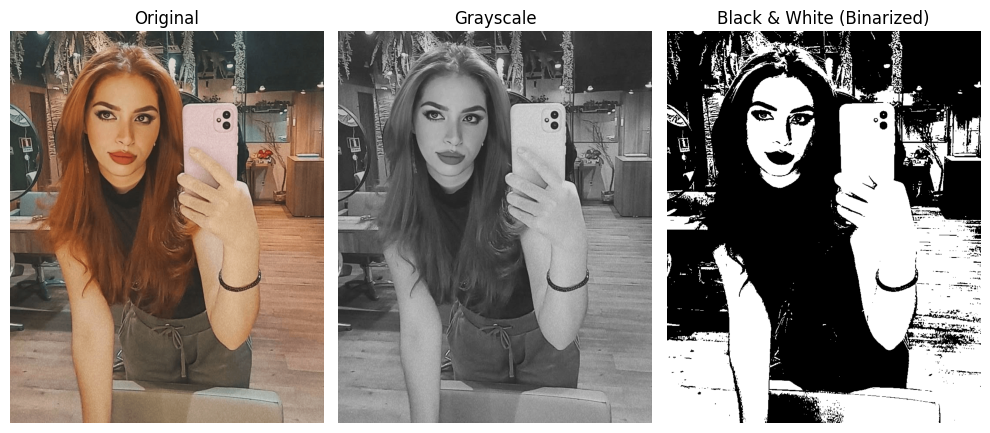

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))

axes[0].imshow(original_matrix)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(grayscale_matrix)
axes[1].set_title('Grayscale')
axes[1].axis('off')

axes[2].imshow(binarization_matrix)
axes[2].set_title('Black & White (Binarized)')
axes[2].axis('off')

fig.tight_layout()
plt.show()